Tensor Flow CNN Done by Liam

To create a TensorFlow backend sign language recognizer with live camera capabilities in Python, you will need to follow these steps:

1. Collect and label a dataset of hand signs. This can be done by taking pictures of people making different hand signs and labeling each image with the corresponding hand sign.

2. Preprocess the dataset. This may involve resizing the images, converting them to grayscale, and normalizing the pixel values.

3. Split the dataset into training and test sets. You will use the training set to train the model, and the test set to evaluate the model's performance.

4. Build the model. You can use a convolutional neural network (CNN) to classify the hand signs. You will need to define the model architecture, compile the model, and then train it using the training set.

5. Evaluate the model. Once the model is trained, you can use the test set to evaluate its performance. You can use metrics such as accuracy, precision, and recall to assess how well the model is able to classify the hand signs.

6. Fine-tune the model. If the model's performance is not satisfactory, you can try fine-tuning the model by adjusting the hyperparameters, adding or removing layers, or using a different optimization algorithm.

7. Use the OpenCV library to capture live video from the camera. You will need to import the cv2 module and use the cv2.VideoCapture function to open the camera.

8. Preprocess the live video frames. You will need to resize the frames and convert them to grayscale, just as you did with the images in the dataset.

9. Use the trained model to classify the live video frames. You can use the model's predict method to classify each frame as a specific hand sign.

10. Display the live video feed and the predicted hand sign on the screen. You can use the cv2.imshow function to display the video feed and the cv2.putText function to display the predicted hand sign on top of the video.

In [1]:
#Basic Imports
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

#Import Data Set
train_set, test_set = pd.read_csv('mnist_handsigns/sign_mnist_train.csv'), pd.read_csv('mnist_handsigns/sign_mnist_test.csv')


Preprocessing data

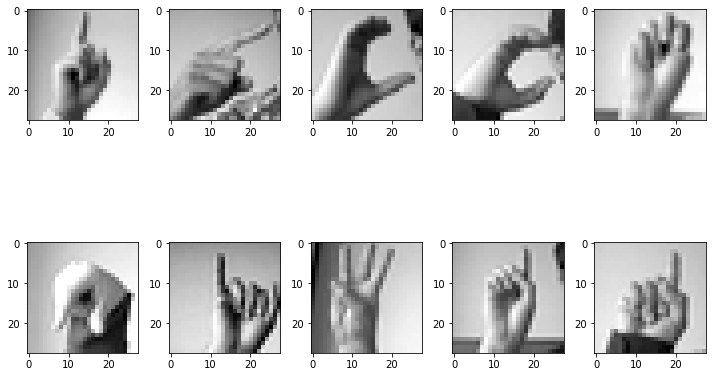

In [2]:
#Seperate the labels we'll be predicting and the grey scaled images

train_labels = train_set['label']
test_labels = test_set['label']

train_set.drop(columns = 'label', inplace = True)
test_set.drop(columns='label', inplace = True)
test_set.head()              

#Transfor multi-class labels to binary labels
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
train_labels = label_bin.fit_transform(train_labels)
test_labels = label_bin.fit_transform(test_labels)

train_set = train_set.values    
test_set = test_set.values 

train_set = train_set/255
test_set = test_set/255

#Reshape 1-D to 3-D
train_set = train_set.reshape(-1,28,28,1)
test_set = test_set.reshape(-1,28,28,1)

#Rotate, blur, shift, zoom images
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(train_set)

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(train_set[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

CNN

In [3]:
#Training the model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(train_set,train_labels, batch_size = 128) ,epochs = 20 , validation_data = (test_set, test_labels) , callbacks = [learning_rate_reduction])

print("Accuracy of the model is - " , model.evaluate(test_set,test_labels)[1]*100 , "%")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0